In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Lets startoff by uploading the spreadsheet of minimum and maximum temperatures for each major city each day from Jan. 1995 to May 2020.

In [180]:
df = pd.read_csv('city_temperature.csv')

C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's start off by comparing the climates of U.S vs. China, which are in similar latitudes and have the same climate classifications (humid subtropical and continential). What I'm interested is comparing a US city and a Chinese city that on's the same latitude and compare their winter temperatures (for simplictity, let's just compare their Janurary temperatures). Let's compare Beijing and Columbus (40th parallel) followed by Shanghai and Savannah (31st parallel). But first let's make sure the database contains data for the cities that we are interested in.

Also let's see if we need to clean up any data by looking for any values that make no sense and delete them. Get rid of any temperatures below -50. To make this process faster, let's overwrite the dataframe to only contain the countries we're interested in; the US and China.

In [181]:
df = df[(df['Country']=='China') | (df['Country']=='US')]
df = df.reset_index(drop = True)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Asia,China,NaN,Beijing,1,1,1995,28.0
1,Asia,China,NaN,Beijing,1,2,1995,29.0
2,Asia,China,NaN,Beijing,1,3,1995,29.9
3,Asia,China,NaN,Beijing,1,4,1995,34.5
4,Asia,China,NaN,Beijing,1,5,1995,36.6


In [182]:
df.describe()['AvgTemperature']

count    1.501666e+06
mean     5.624146e+01
std      2.102543e+01
min     -9.900000e+01
25%      4.290000e+01
50%      5.890000e+01
75%      7.230000e+01
max      1.077000e+02
Name: AvgTemperature, dtype: float64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501666 entries, 0 to 1501665
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1501666 non-null  object 
 1   Country         1501666 non-null  object 
 2   State           1455337 non-null  object 
 3   City            1501666 non-null  object 
 4   Month           1501666 non-null  int64  
 5   Day             1501666 non-null  int64  
 6   Year            1501666 non-null  int64  
 7   AvgTemperature  1501666 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 91.7+ MB


We see here that the minimum value of -99 makes no sense; those are probably default error values, so let's go ahead and remove all of the data corresponding to those values from the database.

In [184]:
for index, i in enumerate(df['AvgTemperature']):
    if i  == -99.0:
        df = df.drop(index, axis = 0)

In [185]:
df.describe()['AvgTemperature']

count    1.496694e+06
mean     5.675717e+01
std      1.905811e+01
min     -5.000000e+01
25%      4.310000e+01
50%      5.900000e+01
75%      7.240000e+01
max      1.077000e+02
Name: AvgTemperature, dtype: float64

In [186]:
df[df['Country']=='China']['City'].unique()

array(['Beijing', 'Chengdu', 'Guangzhou', 'Shanghai', 'Shenyang'],
      dtype=object)

In [187]:
dfshanghai = df[df['City']=='Shanghai']

In [188]:
dfbeijing = df[df['City']=='Beijing']
dfbeijing.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Asia,China,NaN,Beijing,1,1,1995,28.0
1,Asia,China,NaN,Beijing,1,2,1995,29.0
2,Asia,China,NaN,Beijing,1,3,1995,29.9
3,Asia,China,NaN,Beijing,1,4,1995,34.5
4,Asia,China,NaN,Beijing,1,5,1995,36.6


In [189]:
dfcolumbus = df[(df['City']=='Columbus') & (df['State']=='Ohio')]
dfcolumbus.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
998082,North America,US,Ohio,Columbus,1,1,1995,42.4
998083,North America,US,Ohio,Columbus,1,2,1995,21.4
998084,North America,US,Ohio,Columbus,1,3,1995,22.5
998085,North America,US,Ohio,Columbus,1,4,1995,14.3
998086,North America,US,Ohio,Columbus,1,5,1995,8.1


In [190]:
dfsavannah = df[(df['State']=='Georgia') & (df['City']=='Savannah')]
dfsavannah.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
390060,North America,US,Georgia,Savannah,1,1,1995,51.2
390061,North America,US,Georgia,Savannah,1,2,1995,54.4
390062,North America,US,Georgia,Savannah,1,3,1995,44.5
390063,North America,US,Georgia,Savannah,1,4,1995,40.5
390064,North America,US,Georgia,Savannah,1,5,1995,37.7


Now that we know the cities are there, let's compare the cities by their average temperatures in Janurary by year.

In [191]:
dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean().head()

,Year,Month,Day,AvgTemperature
0,1995,1.0,16.0,29.887097
1,1996,1.0,16.0,27.932258
2,1997,1.0,16.0,27.803226
3,1998,1.0,16.0,37.387097
4,1999,1.0,16.2,31.423333


In [192]:
dfsavannah[dfsavannah['Month']==1].groupby('Year', as_index = False).mean().head()

,Year,Month,Day,AvgTemperature
0,1995,1.0,16.0,50.222581
1,1996,1.0,16.0,49.445161
2,1997,1.0,16.0,50.403226
3,1998,1.0,16.0,52.270968
4,1999,1.0,16.2,52.030000


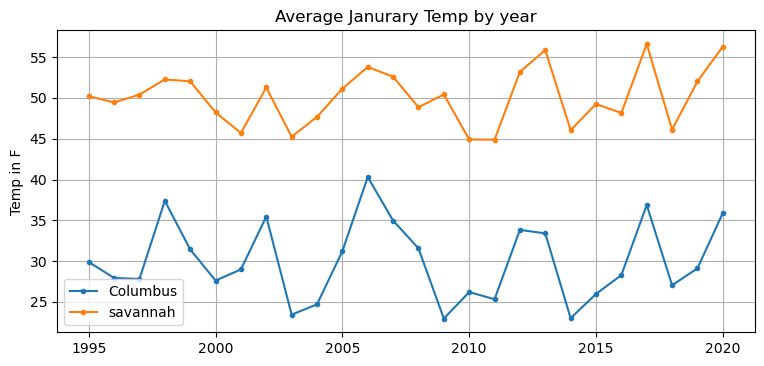

In [193]:
plt.figure(figsize=(9,4),dpi=100)
plt.title('Average Janurary Temp by year')
plt.grid()
plt.ylabel('Temp in F')
plt.xticks(rotation = 'horizontal')
plt.plot(dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()['Year'], dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], label = 'Columbus', marker = '.')
plt.plot(dfsavannah[dfsavannah['Month']==1].groupby('Year', as_index = False).mean()['Year'], dfsavannah[dfsavannah['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], label = 'savannah', marker = '.')
plt.legend()

Let's do the exact same thing with Beijing and Columbus.

In [194]:
dfbeijing = df[df['City']=='Beijing']
dfbeijing.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Asia,China,NaN,Beijing,1,1,1995,28.0
1,Asia,China,NaN,Beijing,1,2,1995,29.0
2,Asia,China,NaN,Beijing,1,3,1995,29.9
3,Asia,China,NaN,Beijing,1,4,1995,34.5
4,Asia,China,NaN,Beijing,1,5,1995,36.6


In [195]:
dfbeijing[dfbeijing['Month']==1].groupby('Year', as_index = False).mean().head()

,Year,Month,Day,AvgTemperature
0,1995,1.0,16.0,30.100000
1,1996,1.0,16.0,27.838710
2,1997,1.0,16.0,23.574194
3,1998,1.0,16.0,25.032258
4,1999,1.0,16.2,28.856667


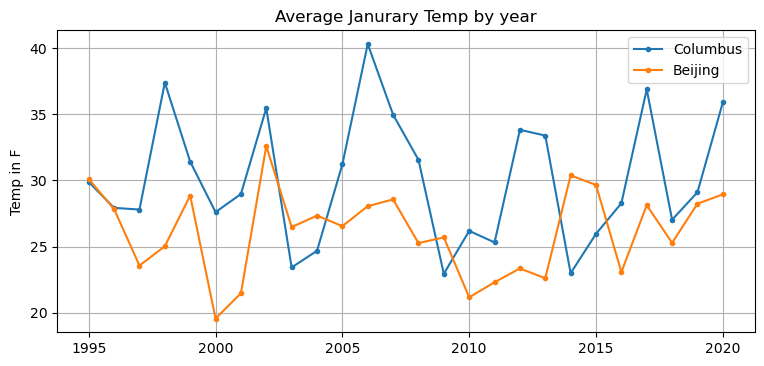

In [196]:
plt.figure(figsize=(9,4),dpi=100)
plt.title('Average Janurary Temp by year')
plt.grid()
plt.ylabel('Temp in F')
plt.xticks(rotation = 'horizontal')
plt.plot(dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()['Year'], dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], label = 'Columbus', marker = '.')
plt.plot(dfbeijing[dfbeijing['Month']==1].groupby('Year', as_index = False).mean()['Year'], dfbeijing[dfbeijing['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], label = 'Beijing', marker = '.')
plt.legend()

As we can see here, Beijing is slightly cooler than Columbus in Janurary overall. However, the standard deviation for Janurary in Columbus is noticably greater than that of Januraries in Beijing. 

Let's compare Shanghai and Savannah.

In [197]:
dfshanghai = df[df['City']=='Shanghai']
dfshanghai.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
27798,Asia,China,NaN,Shanghai,1,1,1995,40.1
27799,Asia,China,NaN,Shanghai,1,2,1995,42.3
27800,Asia,China,NaN,Shanghai,1,3,1995,36.5
27801,Asia,China,NaN,Shanghai,1,4,1995,36.3
27802,Asia,China,NaN,Shanghai,1,5,1995,38.5


In [198]:
dfshanghai[dfshanghai['Month']==1].groupby('Year', as_index = False).mean().head()

,Year,Month,Day,AvgTemperature
0,1995,1.0,16.0,40.358065
1,1996,1.0,16.0,39.154839
2,1997,1.0,16.0,39.061290
3,1998,1.0,16.0,40.287097
4,1999,1.0,16.2,43.626667


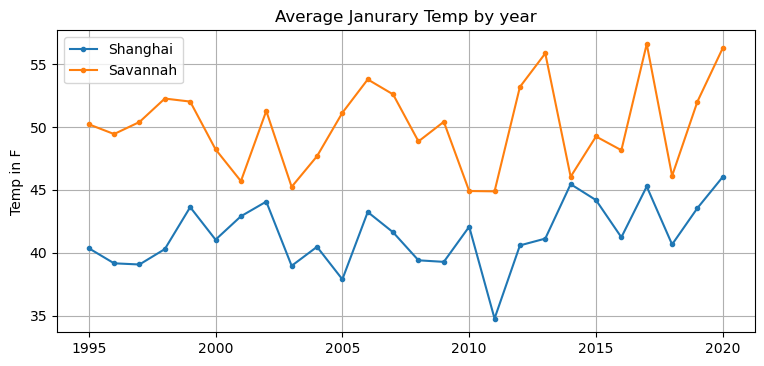

In [199]:
plt.figure(figsize=(9,4),dpi=(100))
plt.grid()
plt.title('Average Janurary Temp by year')
plt.ylabel('Temp in F')
plt.xticks(rotation = 'horizontal')
plt.plot(dfshanghai[dfshanghai['Month']==1].groupby('Year', as_index = False).mean()['Year'], dfshanghai[dfshanghai['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], label = 'Shanghai', marker='.')
plt.plot(dfsavannah[dfsavannah['Month']==1].groupby('Year', as_index = False).mean()['Year'], dfsavannah[dfsavannah['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], label = 'Savannah', marker='.')
plt.legend()

Despite being on the same latitude (and also being near the ocean), Shanghai is noticably colder than Savannah, to the point where the warmest Janurary recorded in Shanghai is about the same as the coldest Janurary recorded in Savannah. 

Can you conclude whether the arctic air patterns vs the siberian air patterns are completely different or not? Let's answer that question by subtracting the 2 cities by Country from each other by average temperature and plot the differences. 

In [200]:
chinatempdifference = dfbeijing[dfbeijing['Month']==1].groupby('Year', as_index= True).mean() - dfshanghai[dfshanghai['Month']==1].groupby('Year', as_index = True).mean()
chinatempdifference.head()

,Month,Day,AvgTemperature
Year,,,
1995,0.0,0.0,-10.258065
1996,0.0,0.0,-11.316129
1997,0.0,0.0,-15.487097
1998,0.0,0.0,-15.254839
1999,0.0,0.0,-14.770000


Notice that we kept as_index as True so that we can keep track of what year corresponds with that Average Temperature difference.

In [201]:
ustempdifference = dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = True).mean() - dfsavannah[dfsavannah['Month']==1].groupby('Year', as_index = True).mean()
ustempdifference.head()

,Month,Day,AvgTemperature
Year,,,
1995,0.0,0.0,-20.335484
1996,0.0,0.0,-21.512903
1997,0.0,0.0,-22.600000
1998,0.0,0.0,-14.883871
1999,0.0,0.0,-20.606667


Text(0, 0.5, 'temp in F')

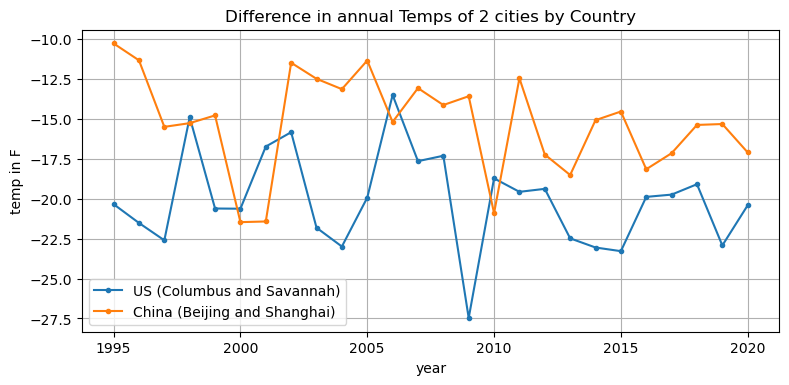

In [202]:
plt.figure(figsize=(9,4), dpi=100)
plt.grid()
plt.xticks(rotation = 'horizontal')
plt.plot(ustempdifference['AvgTemperature'], label = 'US (Columbus and Savannah)', marker = '.')
plt.plot(chinatempdifference['AvgTemperature'], label = 'China (Beijing and Shanghai)', marker = '.')
plt.legend()
plt.title('Difference in annual Temps of 2 cities by Country')
plt.xlabel('year')
plt.ylabel('temp in F')

What we've plotted here is basically the difference in the average Janurary temperatures by each Country (using the data of the 2 cities from each Country) and see how they compare to each other. We see here that Arctic air behaves differently from Siberian air; Arctic air is more susceptible to the influences from the gulf of Mexico than Siberian air is to the South China Sea. Another way to answer the previous is to plot the standard deviation of each city by year (basically the magnitude of the fluctations of temperatures in Janurary)

In [203]:
dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean().iloc[dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()[['AvgTemperature']].idxmin()['AvgTemperature']]

Year              2009.000000
Month                1.000000
Day                 16.000000
AvgTemperature      22.951613
Name: 14, dtype: float64

In [204]:
dfcolumbus[dfcolumbus['Month']==1].groupby('Year').std().head()

,Month,Day,AvgTemperature
Year,,,
1995,0.0,9.092121,12.741396
1996,0.0,9.092121,10.399403
1997,0.0,9.092121,15.496505
1998,0.0,9.092121,9.583936
1999,0.0,9.177935,13.803190


Text(0, 0.5, 'temp in F')

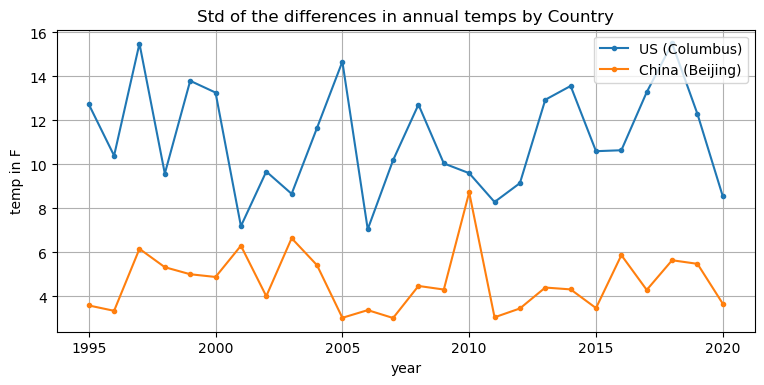

In [205]:
plt.figure(figsize=(9,4), dpi=100)
plt.grid()
plt.xticks(rotation = 'horizontal')
plt.plot(dfcolumbus[dfcolumbus['Month']==1].groupby('Year').std()['AvgTemperature'], label = 'US (Columbus)', marker = '.')
plt.plot(dfbeijing[dfbeijing['Month']==1].groupby('Year').std()['AvgTemperature'], label = 'China (Beijing)', marker = '.')
plt.legend()
plt.title('Std of the differences in annual temps by Country')
plt.xlabel('year')
plt.ylabel('temp in F')

We see here that Januraries in the US are prone to activity from both the Arctic and the gulf of Mexico, while Januraries in China are more prone to Siberian air activity than South and East China Sea.

We can use scatter plots to determine how likely the Arctic high and the Siberian high are to be active in the same year or not.

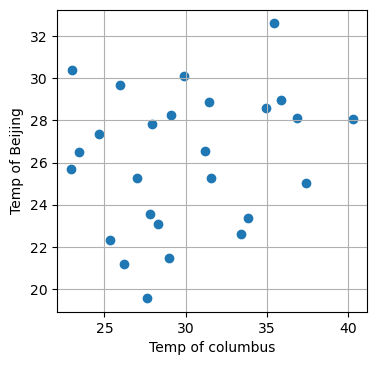

In [206]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'])
plt.xlabel('Temp of columbus')
plt.ylabel('Temp of Beijing')
plt.show()

In [207]:
from scipy import stats
stats.pearsonr(dfcolumbus[dfcolumbus['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Year', as_index = False).mean()['AvgTemperature'])[0]

0.2151004356611398

An R-Value of 0.24 means that it is rare for the Arctic High and the Siberian High to behave the same on each city the same year.

What about the correlation between Columbus and Savannah vs. Beijing and Shanghai? We should get pretty high R-values for each, but with the U.S cities having a lower R-value.

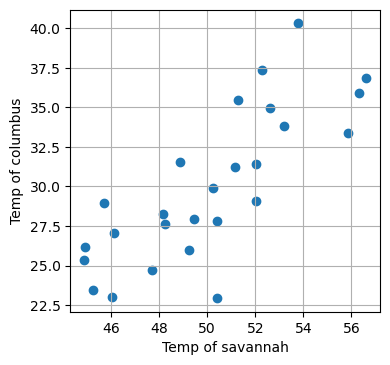

In [208]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfsavannah[dfsavannah['Month']==1].groupby('Year').mean()['AvgTemperature'], dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean()['AvgTemperature'])
plt.xlabel('Temp of savannah')
plt.ylabel('Temp of columbus')
plt.show()

In [209]:
stats.pearsonr(dfsavannah[dfsavannah['Month']==1].groupby('Year').mean()['AvgTemperature'], dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean()['AvgTemperature'])[0]

0.7843883748198601

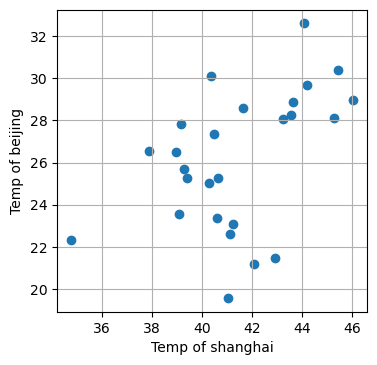

In [210]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfshanghai[dfshanghai['Month']==1].groupby('Year').mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Year').mean()['AvgTemperature'])
plt.xlabel('Temp of shanghai')
plt.ylabel('Temp of beijing')
plt.show()

In [211]:
stats.pearsonr(dfshanghai[dfshanghai['Month']==1].groupby('Year').mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Year').mean()['AvgTemperature'])[0]

0.46870683254093537

Interestingly, China has a lower R-value than the US. This means that the temp.anamoly of Shanghai being the same as that of Beijing is less likely to be the same as that of the temp.anamoly of Savannah mirroring the temp. anamoly of Columbus. This is surprising, given that the US has a higher standard deviation than China in general.

Lets study the correlation between the influence of the arctic high on the West coast vs. on the East coast!

In [212]:
dfsacramento = df[df['City']=='Sacramento']
dfsacramento.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
174728,North America,US,California,Sacramento,1,1,1995,43.0
174729,North America,US,California,Sacramento,1,2,1995,40.6
174730,North America,US,California,Sacramento,1,3,1995,47.5
174731,North America,US,California,Sacramento,1,4,1995,49.2
174732,North America,US,California,Sacramento,1,5,1995,48.6


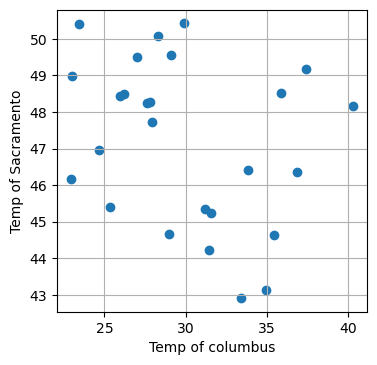

In [213]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean()['AvgTemperature'], dfsacramento[dfsacramento['Month']==1].groupby('Year').mean()['AvgTemperature'])
plt.xlabel('Temp of columbus')
plt.ylabel('Temp of Sacramento')
plt.show()

In [214]:
stats.pearsonr(dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean()['AvgTemperature'], dfsacramento[dfsacramento['Month']==1].groupby('Year').mean()['AvgTemperature'])[0]

-0.29370480146613864

An R-value means that Sacramento is more likely to be above normal if Columbus is below normal in Janurary and vice versa. Lets make a heat map out of this!!! Can you create a heat-map showing all the R-values of all U.S cities relative to Columbus for Janurary? Let's start off by creating a database of U.S cities and each of their R-Values for Janurary. Let's have the dataframe contain 3 columns: the City, State, and the R-Value.

In [215]:
citydata = []
citystate = []
cityname = []
for i in df[df['Country']=='US']['City'].unique():
    dftest = df[df['City']==i]
    if (dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean().count()[0] == dftest[dftest['Month']==1].groupby('Year').mean().count()[0] 
    and dfcolumbus[dfcolumbus['Month']==2].groupby('Year').mean().count()[0] == dftest[dftest['Month']==2].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==3].groupby('Year').mean().count()[0] == dftest[dftest['Month']==3].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==4].groupby('Year').mean().count()[0] == dftest[dftest['Month']==4].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==5].groupby('Year').mean().count()[0] == dftest[dftest['Month']==5].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==6].groupby('Year').mean().count()[0] == dftest[dftest['Month']==6].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==7].groupby('Year').mean().count()[0] == dftest[dftest['Month']==7].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==8].groupby('Year').mean().count()[0] == dftest[dftest['Month']==8].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==9].groupby('Year').mean().count()[0] == dftest[dftest['Month']==9].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==10].groupby('Year').mean().count()[0] == dftest[dftest['Month']==10].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==11].groupby('Year').mean().count()[0] == dftest[dftest['Month']==11].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==12].groupby('Year').mean().count()[0] == dftest[dftest['Month']==12].groupby('Year').mean().count()[0]):
        cityname.append(i)
        citystate.append([i, df[(df['City']==i) & (df['Country']=='US')]['State'].iloc[0]])
        citydata.append((stats.pearsonr(dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean()['AvgTemperature'], dftest[dftest['Month']==1].groupby('Year').mean()['AvgTemperature']))[0])

In [216]:
dflist = pd.DataFrame(list(zip(cityname, citystate, citydata)), columns=['City', 'State', 'R-value'])
dflist.sort_values(by=['R-value'],ascending=True).head()

,City,State,R-value
14,San Diego,"[San Diego, California]",-0.512517
12,Los Angeles,"[Los Angeles, California]",-0.491631
7,Phoenix,"[Phoenix, Arizona]",-0.440569
8,Tucson,"[Tucson, Arizona]",-0.382481
76,Las Vegas,"[Las Vegas, Nevada]",-0.372885


Now that we have created a dataframe containing R-Value comparsions for the month of Januraries, let's create the heat map. First let's get the coordinates for each U.S city.

In [217]:
import geopandas as gpd

In [218]:
map_df = gpd.read_file('USA_adm/USA_adm1.shp')

In [219]:
import cartopy.crs as crs
import cartopy.feature as cfeature

df.head()

In [220]:
from geopy.geocoders import Nominatim
import math

In [221]:
geolocator = Nominatim(user_agent = 'jason_duong96@hotmail.com')
geolocator.geocode('Birmingham, AL')[1]

(33.5206824, -86.8024326)

In [222]:
latitude = []
longitude = []
for i in dflist['State']:
    latitude.append(geolocator.geocode(i)[1][0])
    longitude.append(geolocator.geocode(i)[1][1])


In [223]:
dflist = dflist.assign(Latitude = latitude, Longitude = longitude)

In [224]:
dflist.head()

,City,State,R-value,Latitude,Longitude
0,Birmingham,"[Birmingham, Alabama]",0.813120,33.520682,-86.802433
1,Huntsville,"[Huntsville, Alabama]",0.828346,34.729847,-86.585901
2,Mobile,"[Mobile, Alabama]",0.719335,30.694357,-88.043054
3,Montgomery,"[Montgomery, Alabama]",0.756992,32.366966,-86.300648
4,Anchorage,"[Anchorage, Alaska]",-0.324504,61.216313,-149.894852


Now let's create the heat map. To do this, we have to use the Mercator projection 

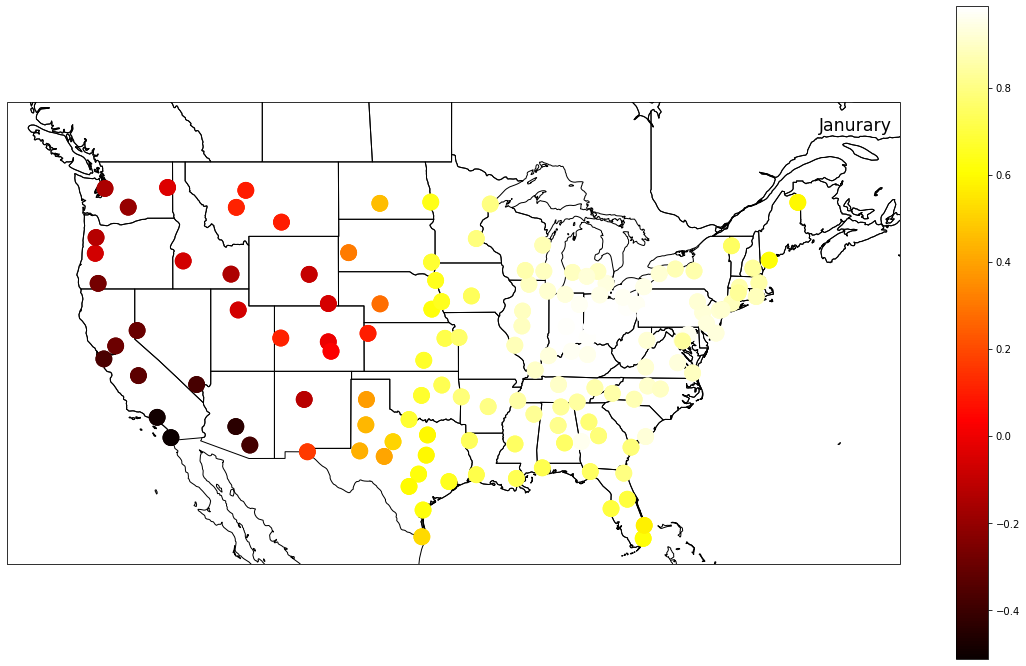

In [225]:
figure = plt.figure(figsize=(20,12))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
# Zoom in on the US by setting longitude/latitude parameters
ax.set_extent(
    [-130, # minimum latitude
        -60, # min longitude
        24, # max latitude
        52 # max longitude
    ],
    crs=crs.PlateCarree()
)
plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist['R-value'], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree())
plt.colorbar(plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist['R-value'], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree()))
plt.text(0.95,0.95,'Janurary',horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, size= 'xx-large')
plt.show()

Nice! You've created a map that shows the influence of the Arctic High on most major U.S cities relative to Columbus, by showing the R-value of each major city (Janurary anamoly relative to Columbus) for Janurary! Now can you create an animation that shows the R-Values of all cities year-round?

In [226]:
dflist= dflist[['City', 'State', 'Latitude', 'Longitude', 'R-value']]
dflist.head()

,City,State,Latitude,Longitude,R-value
0,Birmingham,"[Birmingham, Alabama]",33.520682,-86.802433,0.813120
1,Huntsville,"[Huntsville, Alabama]",34.729847,-86.585901,0.828346
2,Mobile,"[Mobile, Alabama]",30.694357,-88.043054,0.719335
3,Montgomery,"[Montgomery, Alabama]",32.366966,-86.300648,0.756992
4,Anchorage,"[Anchorage, Alaska]",61.216313,-149.894852,-0.324504


In [227]:
citylist = df[df['Country']=='US']['City'].unique()
for i in range(2,13,1):
    citydata = []
    for k in citylist:
        dftest = df[df['City']==k]
        if (dfcolumbus[dfcolumbus['Month']==1].groupby('Year').mean().count()[0] == dftest[dftest['Month']==1].groupby('Year').mean().count()[0] 
    and dfcolumbus[dfcolumbus['Month']==2].groupby('Year').mean().count()[0] == dftest[dftest['Month']==2].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==3].groupby('Year').mean().count()[0] == dftest[dftest['Month']==3].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==4].groupby('Year').mean().count()[0] == dftest[dftest['Month']==4].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==5].groupby('Year').mean().count()[0] == dftest[dftest['Month']==5].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==6].groupby('Year').mean().count()[0] == dftest[dftest['Month']==6].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==7].groupby('Year').mean().count()[0] == dftest[dftest['Month']==7].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==8].groupby('Year').mean().count()[0] == dftest[dftest['Month']==8].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==9].groupby('Year').mean().count()[0] == dftest[dftest['Month']==9].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==10].groupby('Year').mean().count()[0] == dftest[dftest['Month']==10].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==11].groupby('Year').mean().count()[0] == dftest[dftest['Month']==11].groupby('Year').mean().count()[0]
    and dfcolumbus[dfcolumbus['Month']==12].groupby('Year').mean().count()[0] == dftest[dftest['Month']==12].groupby('Year').mean().count()[0]):
            citydata.append((stats.pearsonr(dfcolumbus[dfcolumbus['Month']==i].groupby('Year').mean()['AvgTemperature'], dftest[dftest['Month']==i].groupby('Year').mean()['AvgTemperature']))[0])
    dflist.insert(3+i, i, citydata, True)

In [228]:
dflist

,City,State,Latitude,Longitude,R-value,2,3,4,5,6,7,8,9,10,11,12
0,Birmingham,"[Birmingham, Alabama]",33.520682,-86.802433,0.813120,0.764813,0.797905,0.759314,0.794296,0.334689,0.531440,0.628666,0.810859,0.586545,0.859729,0.889435
1,Huntsville,"[Huntsville, Alabama]",34.729847,-86.585901,0.828346,0.810201,0.840198,0.801473,0.857858,0.407089,0.512275,0.651598,0.869679,0.595810,0.887162,0.890253
2,Mobile,"[Mobile, Alabama]",30.694357,-88.043054,0.719335,0.658819,0.659644,0.563470,0.597903,0.001935,0.087602,0.258365,0.663569,0.295005,0.724522,0.813123
3,Montgomery,"[Montgomery, Alabama]",32.366966,-86.300648,0.756992,0.641159,0.727847,0.626004,0.695859,0.264160,0.201661,0.356562,0.836076,0.509298,0.780341,0.826692
4,Anchorage,"[Anchorage, Alaska]",61.216313,-149.894852,-0.324504,-0.042835,-0.436108,-0.197311,-0.221717,-0.246088,-0.192204,-0.149603,0.299894,0.005732,-0.434079,-0.096674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Green Bay,"[Green Bay, Wisconsin]",44.512638,-88.012579,0.871666,0.801798,0.811339,0.740689,0.845027,0.568016,0.888074,0.810520,0.718802,0.757332,0.913283,0.809684
141,Madison,"[Madison, Wisconsin]",43.074761,-89.383761,0.861992,0.820493,0.882534,0.792908,0.895341,0.700193,0.911449,0.757485,0.793708,0.709511,0.927626,0.842735
142,Milwaukee,"[Milwaukee, Wisconsin]",43.034993,-87.922497,0.886881,0.873278,0.893903,0.813641,0.796763,0.614589,0.922624,0.805959,0.819694,0.770765,0.930109,0.862949
143,Casper,"[Casper, Wyoming]",42.850119,-106.325138,-0.095407,0.110693,0.481141,0.242231,0.410937,0.052383,0.376204,0.163325,0.367436,0.108696,0.359709,0.172132


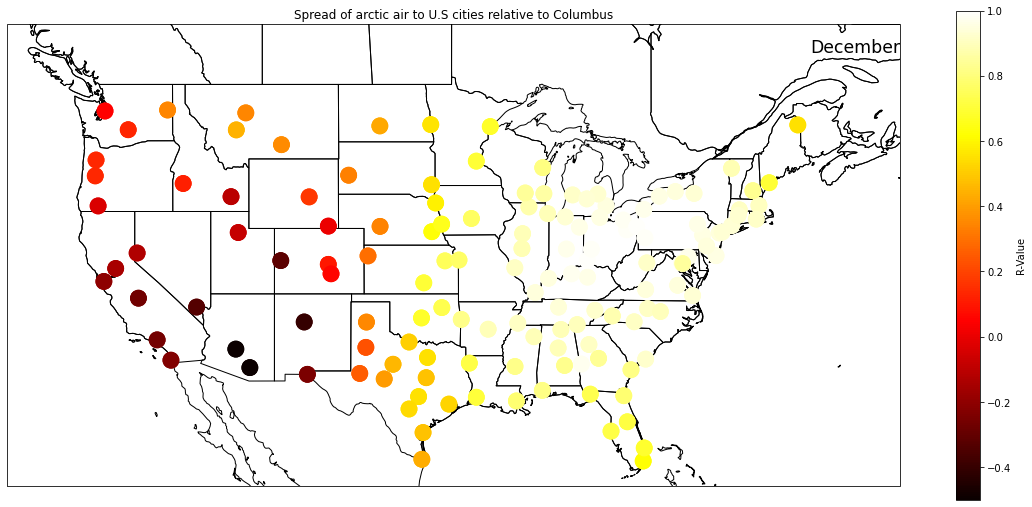

In [252]:
from IPython import display
from matplotlib import animation
months = ['January','Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(1,13,1):
    figure = plt.figure(figsize=(20,12))
    ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    # Zoom in on the US by setting longitude/latitude parameters
    ax.set_extent(
    [-130, # minimum latitude
        -60, # min longitude
        24, # max latitude
        52 # max longitude
    ],
    crs=crs.PlateCarree()
    )
    display.clear_output(wait=True)
    plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist.iloc[:, 3+i], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree())
    plt.title('Spread of arctic air to U.S cities relative to Columbus')
    plt.colorbar(plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist.iloc[:, 3+i], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree()), label='R-Value', shrink=0.75)
    plt.clim(vmin=-0.5, vmax=1)
    plt.text(0.95,0.95,months[i-1],horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, size= 'xx-large')
    plt.pause(0.5)
    plt.show()